In [1]:
import pandas as pd
import numpy as np
import ast  # For safely converting string to list
import csv
import matplotlib.pyplot as plt
from scipy.interpolate import splprep, splev

In [2]:

# Open the file and process it manually
data = []
with open("../dataset/MOLHW_preprocess_unicode/big.txt", "r", encoding="utf-8") as file:
    reader = csv.reader(file)  # Read file line by line
    
    for row in reader:
        if not row:
            continue  # Skip empty lines
        
        first_5_columns = row[:5]  # First 5 columns
        last_column = ",".join(row[5:])  # Join remaining columns to reconstruct the coordinate array
        
        try:
            coordinates = ast.literal_eval(last_column)  # Convert string to list safely
        except Exception as e:
            print(f"Error parsing coordinates: {last_column} - {e}")
            coordinates = None  # Handle errors gracefully
        
        data.append(first_5_columns + [coordinates])
df = pd.DataFrame(data, columns=["label", "author",  "width",  "height", "density", "coordinates"])


In [ ]:
# # Define file paths
# input_file = '../../dataset_preprocessing/MOLHW_preprocess_unicode/big.txt'  # Your large input file
# output_file = '../../dataset_preprocessing/MOLHW_preprocess_unicode/small.txt'  # File to save the first 1000 rows

# # Open the input file in read mode and output file in write mode
# with open(input_file, 'r', encoding='utf-8') as infile, open(output_file, 'w', encoding='utf-8') as outfile:
#     # Read the first 1000 lines
#     for i, line in enumerate(infile):
#         if i < 1000:
#             outfile.write(line)  # Write the line to the output file
#         else:
#             break  # Stop after 1000 lines

In [9]:
def plot_points(x):
    """
    Plots individual points from a list of coordinate points and connects neighboring points with lines,
    but avoids drawing lines across (-1, -1) separators.
    """

    coords = df.iloc[x]['coordinates'][1:]
    img_width, img_height = int(df.iloc[x]['width']), int(df.iloc[x]['height'])

    # Scale figure
    plt.figure(figsize=(img_width / 150, img_height / 150))  

    # Convert normalized coordinates to image dimensions, keeping (-1, -1) separators
    scaled_coords = [(x * img_width, y * img_height) if (x, y) != (-1, -1) else (-1, -1) for x, y in coords]

    # Separate segments
    segments = []
    current_segment = []

    for point in scaled_coords:
        if point == (-1, -1):  
            if current_segment:  
                segments.append(current_segment)
                current_segment = []
        else:
            current_segment.append(point)

    if current_segment:
        segments.append(current_segment)

    # Plot lines and points with distinct colors
    colors = ['blue', 'green', 'orange', 'purple', 'brown']  # Color options for segments
    for i, segment in enumerate(segments):
        if len(segment) > 1:
            x_vals, y_vals = zip(*segment)
            plt.plot(x_vals, y_vals, color=colors[i % len(colors)], linewidth=2, linestyle='-')  
        
           

    # Flip Y-axis to match image coordinates
    plt.xlim(0, img_width)
    plt.ylim(0, img_height)
    plt.gca().invert_yaxis()

    # Add grid with transparency
    plt.grid(True, linestyle="--", alpha=0.5)

    # Add title
    plt.title(df.iloc[x]['label'], fontsize=12, fontweight='bold')
    
    
    plt.show()

    



In [42]:
def preprocess_image(x):
    coords = df.iloc[x]['coordinates'][1:]
    img_width, img_height = int(df.iloc[x]['width']), int(df.iloc[x]['height'])

    # Scale figure
    plt.figure(figsize=(img_width / 150, img_height / 150))  

    # Convert normalized coordinates to image dimensions, keeping (-1, -1) separators
    scaled_coords = [(x * img_width, y * img_height) if (x, y) != (-1, -1) else (-1, -1) for x, y in coords]

    # Separate segments
    segments = []
    current_segment = []

    for point in scaled_coords:
        if point == (-1, -1):  
            if current_segment:  
                segments.append(current_segment)
                current_segment = []
        else:
            current_segment.append(point)

    if current_segment:
        segments.append(current_segment)

    # Plot lines and points with distinct colors
    colors = ['blue', 'green', 'orange', 'purple', 'brown']  # Color options for segments
    for i, segment in enumerate(segments):
        if len(segment) > 1:
            x_vals, y_vals = zip(*segment)
            plt.plot(x_vals, y_vals, color=colors[i % len(colors)], linewidth=2, linestyle='-')  
        
           

    # Flip Y-axis to match image coordinates
    plt.xlim(0, img_width)
    plt.ylim(0, img_height)
    plt.gca().invert_yaxis()

    plt.axis("off")

    # Add grid with transparency
    plt.grid(True, linestyle="--", alpha=0.5)
    plt.savefig("output_image.png", dpi=150, bbox_inches="tight", pad_inches=0)
    plt.show()

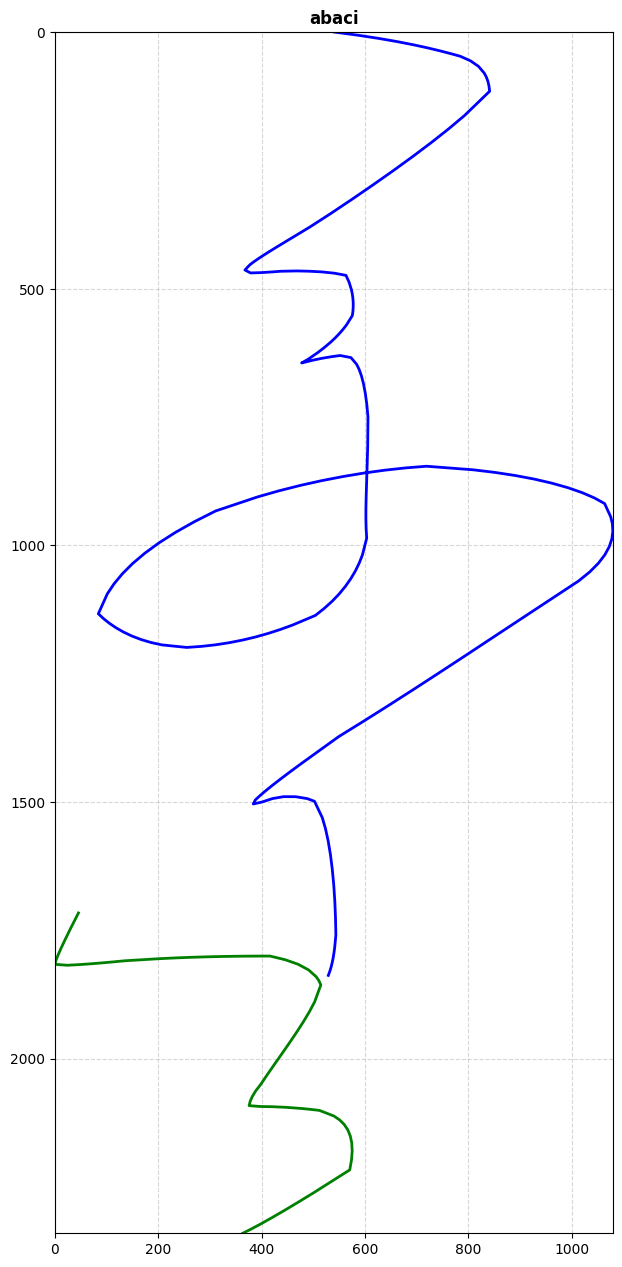

In [ ]:
# Plot the points
plot_points(33)

In [35]:
df.iloc[0]['coordinates']

[[-1, -1],
 [0.7425679968102712, 0.0],
 [0.7542637454174199, 0.003096760566047288],
 [0.7706594700182252, 0.0074706688306658995],
 [0.7892211062763235, 0.012477521693024863],
 [0.8074145898553509, 0.017473116052293063],
 [0.8292708745779843, 0.024150721734217253],
 [0.8437623622968939, 0.029098824017487538],
 [0.8529173311632033, 0.03286915171969444],
 [0.8610806700696183, 0.03752322272198981],
 [0.8477284356266453, 0.05607077721313155],
 [0.8346629276463275, 0.06670582471825275],
 [0.818309099017343, 0.078482283160485],
 [0.7988328659143844, 0.09118553163056363],
 [0.7764001445121463, 0.10460094921922435],
 [0.751176850985322, 0.11851391501720257],
 [0.723328901508606, 0.13270980811523392],
 [0.6930222122566909, 0.1469740076040539],
 [0.660422699404271, 0.16109189257439802],
 [0.5862094375953169, 0.19015469684907815],
 [0.5541344748336708, 0.2023618371470375],
 [0.5252915918539132, 0.21311666363904522],
 [0.4998040327790427, 0.2224920718903278],
 [0.4890020711310719, 0.230560957466111

In [64]:
def preprocess_imagea(x):
    coords = df.iloc[x]['coordinates'][1:]  
    img_width, img_height = int(df.iloc[x]['width']), int(df.iloc[x]['height'])

    # Scale figure
    plt.figure(figsize=(img_width / 150, img_height / 150))

    # Convert normalized coordinates to image dimensions
    scaled_coords = [(x * img_width, y * img_height) if (x, y) != (-1, -1) else (-1, -1) for x, y in coords]

    # Separate stroke segments
    segments = []
    current_segment = []

    for point in scaled_coords:
        if point == (-1, -1):
            if current_segment:
                segments.append(current_segment)
                current_segment = []
        else:
            current_segment.append(point)

    if current_segment:
        segments.append(current_segment)

    processed_segments = []

    for segment in segments:
        if len(segment) < 2:
            continue

        points = np.array(segment)

        # 1. **Interpolation using B-spline**
        tck, u = splprep(points.T, s=0)  
        u_new = np.linspace(0, 1, 100)  
        interpolated_points = np.array(splev(u_new, tck)).T  

        # 2. **Resampling (Uniform Spacing)**
        def resample_curve(points, num_samples=50):
            distances = np.cumsum(np.sqrt(np.sum(np.diff(points, axis=0) ** 2, axis=1)))
            distances = np.insert(distances, 0, 0)  
            uniform_distances = np.linspace(0, distances[-1], num_samples)  
            resampled_points = np.array([np.interp(uniform_distances, distances, points[:, i]) for i in range(2)]).T  
            return resampled_points

        resampled_points = resample_curve(interpolated_points)

        # 3. **Deletion (Threshold Check)**
        if len(resampled_points) < 50:
            continue  # Skip samples with too few points

        # 4. **Normalization (Centering & Y-Inversion)**
        def normalize_points(points, canvas_size=(img_width, img_height)):
            min_vals = points.min(axis=0)
            max_vals = points.max(axis=0)

            # Center the points
            centered_points = points - (min_vals + max_vals) / 2

            # Scale proportionally
            scale_factor = min(canvas_size[0] / (max_vals[0] - min_vals[0]), 
                                canvas_size[1] / (max_vals[1] - min_vals[1]))
            normalized_points = centered_points * scale_factor + np.array(canvas_size) / 2  

            # **Fix Y-axis inversion (Flip Y-coordinates manually)**
            normalized_points[:, 1] = canvas_size[1] - normalized_points[:, 1]

            return normalized_points

        normalized_points = normalize_points(resampled_points)
        processed_segments.append(normalized_points)

    # **Plot Processed Segments**
    colors = ['blue', 'green', 'orange', 'purple', 'brown']
    for i, segment in enumerate(processed_segments):
        if len(segment) > 1:
            x_vals, y_vals = zip(*segment)
            plt.plot(x_vals, y_vals, color=colors[i % len(colors)], linewidth=2, linestyle='-')

    # Set image properties
    plt.xlim(0, img_width)
    plt.ylim(0, img_height)
    # Ensure correct Y orientation
    plt.axis("off")

    # Add grid with transparency
    plt.grid(True, linestyle="--", alpha=0.5)
    plt.savefig("output_image.png", dpi=150, bbox_inches="tight", pad_inches=0)

    plt.show()


Saved: output_images\ab.png
Skipping duplicate label: ab
Skipping duplicate label: ab
Skipping duplicate label: ab
Saved: output_images\aba.png
Skipping duplicate label: aba
Skipping duplicate label: aba
Skipping duplicate label: aba
Skipping duplicate label: ab
Saved: output_images\abaci.png
Skipping duplicate label: abaci
Saved: output_images\abaciba.png
Skipping duplicate label: abaciba
Skipping duplicate label: abaciba
Skipping duplicate label: abaciba
Skipping duplicate label: abaciba
Skipping duplicate label: abaciba
Skipping duplicate label: abaciba
Skipping duplicate label: abaciba
Skipping duplicate label: abaciba
Skipping duplicate label: abaciba
Saved: output_images\abacibai.png
Skipping duplicate label: abacibai
Skipping duplicate label: abacibai
Skipping duplicate label: abacibai
Skipping duplicate label: abacibai
Skipping duplicate label: abacibai
Skipping duplicate label: abacibai
Skipping duplicate label: abacibai
Saved: output_images\abacibal.png
Skipping duplicate lab

KeyboardInterrupt: 

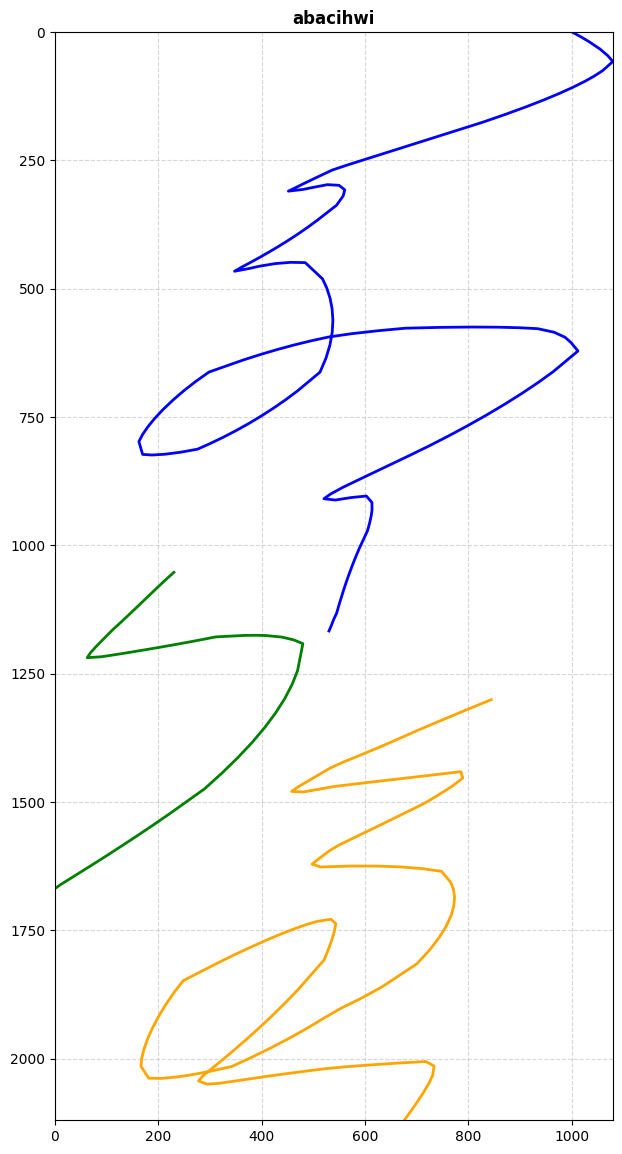

In [ ]:
# import os
# import numpy as np
# import matplotlib.pyplot as plt
# from scipy.interpolate import splprep, splev
# import pandas as pd
# import csv
# import ast

# # Read the data from the file
# data = []
# with open("../dataset/MOLHW_preprocess_unicode/big.txt", "r", encoding="utf-8") as file:
#     reader = csv.reader(file)  # Read file line by line

#     for row in reader:
#         if not row:
#             continue  # Skip empty lines
        
#         first_5_columns = row[:5]  # First 5 columns
#         last_column = ",".join(row[5:])  # Join remaining columns to reconstruct the coordinate array
        
#         try:
#             coordinates = ast.literal_eval(last_column)  # Convert string to list safely
#         except Exception as e:
#             print(f"Error parsing coordinates: {last_column} - {e}")
#             coordinates = None  # Handle errors gracefully
        
#         data.append(first_5_columns + [coordinates])
# df = pd.DataFrame(data, columns=["label", "author", "width", "height", "density", "coordinates"])

# # Initialize a set to track processed labels
# processed_labels = set()

# def plot_points(x, output_folder='output_images'):
#     """
#     Plots individual points from a list of coordinate points and connects neighboring points with lines,
#     but avoids drawing lines across (-1, -1) separators.
#     """

#     word_label = df.iloc[x]['label']
    
#     # Skip if the label has already been processed
#     if word_label in processed_labels:
#         print(f"Skipping duplicate label: {word_label}")
#         return

#     # Mark the label as processed
#     processed_labels.add(word_label)

#     coords = df.iloc[x]['coordinates'][1:]
#     img_width, img_height = int(df.iloc[x]['width']), int(df.iloc[x]['height'])

#     # Scale figure
#     plt.figure(figsize=(img_width / 150, img_height / 150))  

#     # Convert normalized coordinates to image dimensions, keeping (-1, -1) separators
#     scaled_coords = [(x * img_width, y * img_height) if (x, y) != (-1, -1) else (-1, -1) for x, y in coords]

#     # Separate segments
#     segments = []
#     current_segment = []

#     for point in scaled_coords:
#         if point == (-1, -1):  
#             if current_segment:  
#                 segments.append(current_segment)
#                 current_segment = []
#         else:
#             current_segment.append(point)

#     if current_segment:
#         segments.append(current_segment)

#     # Plot lines and points with distinct colors
#     colors = ['blue', 'green', 'orange', 'purple', 'brown']  # Color options for segments
#     for i, segment in enumerate(segments):
#         if len(segment) > 1:
#             x_vals, y_vals = zip(*segment)
#             plt.plot(x_vals, y_vals, color=colors[i % len(colors)], linewidth=2, linestyle='-')

#     # Ensure the plot is horizontal (left to right)
#     plt.xlim(0, img_width)
#     plt.ylim(0, img_height)
#     plt.gca().invert_yaxis()  # Invert Y-axis to match the image's origin

#     # Add grid with transparency
#     plt.grid(True, linestyle="--", alpha=0.5)

#     # Add title
#     plt.title(df.iloc[x]['label'], fontsize=12, fontweight='bold')
    
#     # Save the image to the output folder
#     if not os.path.exists(output_folder):
#         os.makedirs(output_folder)

#     # Save the image using label as filename
#     output_path = os.path.join(output_folder, f"{word_label}.png")
#     plt.savefig(output_path, dpi=150, bbox_inches="tight", pad_inches=0)

#     # Close the plot to free memory
#     plt.close()

#     print(f"Saved: {output_path}")

# # Process each row in the DataFrame (example for first 10 rows)
# for i in range(len(df)):  # Adjust the range to process more rows
#     plot_points(i)


In [1]:
def smooth_segment(segment, smoothing_factor=0.5):
    try:
        if len(segment) < 3:
            return segment  # No need to smooth if only two points
        
        x_vals, y_vals = zip(*segment)
        
        # Create parameter values (t) for the points
        t = np.linspace(0, 1, len(segment))
        
        # Create a B-spline representation
        tck, u = splprep([x_vals, y_vals], s=smoothing_factor)
        
        # Generate more interpolated points
        u_fine = np.linspace(0, 1, len(segment) * 5)  # Increase points for smoother curve
        smoothed = splev(u_fine, tck)
        
        return list(zip(smoothed[0], smoothed[1]))
    except Exception as e:
        return segment
def plot_coordinates(coords, img_width, img_height, image_path, thickness = 2, sm_fac=0.2, padding=20):
    """
    Plots individual points from a list of coordinate points and connects neighboring points with lines,
    avoiding lines across (-1, -1) separators, with added padding.
    """
    # coords = df.iloc[x]['coordinates'][1:]
    # img_width, img_height = int(df.iloc[x]['width']), int(df.iloc[x]['height'])

    # Scale figure
    plt.figure(figsize=(img_width / 150, img_height / 150))

    # Convert normalized coordinates to image dimensions, keeping (-1, -1) separators
    scaled_coords = [(x * img_width, y * img_height) if (x, y) != (-1, -1) else (-1, -1) for x, y in coords]

    # Separate segments
    segments = []
    current_segment = []

    for point in scaled_coords:
        if point == (-1, -1):  
            if current_segment:  
                segments.append(current_segment)
                current_segment = []
        else:
            current_segment.append(point)

    if current_segment:
        segments.append(current_segment)

    for segment in segments:
        if len(segment) > 1:
            smoothed_segment = smooth_segment(segment, smoothing_factor=sm_fac)
            x_vals, y_vals = zip(*smoothed_segment)
            plt.plot(x_vals, y_vals, color='black', linewidth=thickness, linestyle='-')

    # Flip Y-axis to match image coordinates
    plt.xlim(-padding, img_width + padding)
    plt.ylim(img_height + padding, -padding)
    
    # Remove grid, title, and axes
    plt.axis('off')

    plt.savefig(image_path, dpi=72, bbox_inches="tight", pad_inches=0)
    plt.close()

In [8]:
import os
import json
import csv
import ast
import matplotlib.pyplot as plt
import numpy as np

data_path = "../../dataset_preprocessing/MOLHW_preprocess_unicode/MOLHW_preprocess_unicode.txt"
json_path = "../../dataset_adiya/MOLHW_unicode/data.json"  # Use existing JSON for paths

# Load JSON to get image paths
with open(json_path, "r", encoding="utf-8") as f:
    data = json.load(f)

def plot_coordinates(coords, width, height, save_path, sm_fac=0.2, thickness=5, padding=100):
    """Generates an image from coordinate data and saves it."""
    if coords is None or not coords:
        return  # Skip if no coordinates
    
    # Convert coordinate list to numpy array
    coords = np.array(coords)
    if len(coords.shape) != 2 or coords.shape[1] != 2:
        return  # Skip if data is not in (x, y) format

    # Create a blank figure
    fig, ax = plt.subplots(figsize=(width / 100, height / 100), dpi=100)
    ax.set_xlim(0, width)
    ax.set_ylim(0, height)
    ax.invert_yaxis()  # Match coordinate system
    
    # Plot strokes
    ax.plot(coords[:, 0], coords[:, 1], 'k', linewidth=thickness)

    # Remove axes for clean image
    ax.axis('off')
    
    # Ensure the output folder exists
    os.makedirs(os.path.dirname(save_path), exist_ok=True)

    # Save and close figure
    plt.savefig(save_path, bbox_inches='tight', pad_inches=padding / 100, dpi=100)
    plt.close(fig)  # Prevent memory leak

s = 0
with open(data_path, "r", encoding="utf-8") as file:
    reader = csv.reader(file)
    
    for row in reader:
        if not row:
            continue  # Skip empty lines

        if s % 1000 == 999:
            print(f"Processed {s+1} rows")
        
        first_5_columns = row[:5]  # First 5 columns
        last_column = ",".join(row[5:])  # Join remaining columns to reconstruct the coordinate array

        try:
            coordinates = ast.literal_eval(last_column)  # Convert string to list safely
        except Exception as e:
            print(f"Error parsing coordinates: {last_column} - {e}")
            continue  # Skip faulty rows

        # Get image path from JSON data
        if s >= len(data):
            break  # Stop if JSON data is exhausted

        image_path = data[s]["image_path"]
        plot_coordinates(coordinates, int(first_5_columns[2]), int(first_5_columns[3]), image_path, sm_fac=0.2, thickness=5, padding=100)

        s += 1

# df = pd.DataFrame(data, columns=["label", "author",  "width",  "height", "density", "coordinates"])
s

Processed 1000 rows
Processed 2000 rows
Processed 3000 rows
Processed 4000 rows


KeyboardInterrupt: 

In [1]:

import os
import csv
import ast
import gc
import json
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import splprep, splev
from matplotlib import use

# Backend тохируулах (RAM багасгана)
use("Agg")

def smooth_segment(segment, smoothing_factor=0.5, num_points=10):
    if len(segment) < 4:
        return segment

    x_vals, y_vals = zip(*segment)
    t = np.linspace(0, 1, len(segment))

    try:
        tck, _ = splprep([x_vals, y_vals], s=smoothing_factor)
        u_fine = np.linspace(0, 1, num_points)
        smoothed = splev(u_fine, tck)
        return list(zip(smoothed[0], smoothed[1]))
    except Exception as e:
        print(f"Error in splprep: {e}")
        return segment

def plot_coordinates(coords, img_width, img_height, image_path, thickness=2, sm_fac=0.2, padding=20):
    plt.figure(figsize=(img_width / 200, img_height / 200), dpi=72)

    scaled_coords = [(x * img_width, y * img_height) if (x, y) != (-1, -1) else (-1, -1) for x, y in coords]

    segments, current_segment = [], []
    for point in scaled_coords:
        if point == (-1, -1):
            if current_segment:
                segments.append(current_segment)
                current_segment = []
        else:
            current_segment.append(point)

    if current_segment:
        segments.append(current_segment)

    for segment in segments:
        if len(segment) > 1:
            smoothed_segment = smooth_segment(segment, smoothing_factor=sm_fac, num_points=len(segment) * 2)
            x_vals, y_vals = zip(*smoothed_segment)
            plt.plot(x_vals, y_vals, color="black", linewidth=thickness)

    plt.xlim(-padding, img_width + padding)
    plt.ylim(img_height + padding, -padding)
    plt.axis("off")

    plt.savefig(image_path, bbox_inches="tight", pad_inches=0)
    plt.close()
    gc.collect()

data_path = "../../dataset_preprocessing/MOLHW_preprocess_unicode/MOLHW_preprocess_unicode.txt"
folder_path = "../../dataset_adiya/MOLHW_unicode"
json_path = os.path.join(folder_path, "data.json")

start_index = 21656
s = 0

# Ensure output folder exists
os.makedirs(os.path.join(folder_path, "images"), exist_ok=True)

# Open JSON file in append mode
# ... [rest of your code is unchanged] ...

with open(json_path, "a", encoding="utf-8") as json_file:
    with open(data_path, "r", encoding="utf-8") as file:
        reader = csv.reader(file)

        for row in reader:
            if not row:
                continue

            if s < start_index:
                s += 1
                continue

            if s % 1000 == 999:
                print(f"Processed {s+1} images")

            first_5_columns = row[:5]
            last_column = ",".join(row[5:])

            try:
                coordinates = ast.literal_eval(last_column)
            except Exception as e:
                print(f"Error parsing coordinates: {e}")
                continue

            image_name = f"{s}.png"
            image_path = os.path.join(folder_path, "images", image_name)

            if os.path.exists(image_path):
                s += 1
                continue

            plot_coordinates(
                coordinates,
                int(first_5_columns[2]),
                int(first_5_columns[3]),
                image_path,
                sm_fac=0.2,
                thickness=5,
                padding=50,
            )

            label = row[0]  # ✅ Label from the first column
            json_line = {
                "label": label,
                "path": os.path.join("images", image_name)
            }
            json_file.write(json.dumps(json_line, ensure_ascii=False) + "\n")

            s += 1

            del coordinates, first_5_columns, last_column
            gc.collect()


Processed 22000 images
Processed 23000 images
Processed 24000 images
Processed 25000 images


c:\Users\domogdog\miniconda3\envs\mnocr\lib\site-packages\scipy\interpolate\_fitpack_py.py:159: RuntimeWarning: The maximal number of iterations (20) allowed for finding smoothing
spline with fp=s has been reached. Probable cause: s too small.
(abs(fp-s)/s>0.001)
  res = _impl.splprep(x, w, u, ub, ue, k, task, s, t, full_output, nest, per,


Processed 26000 images
Processed 27000 images
Processed 28000 images
Processed 29000 images
Processed 30000 images
Processed 31000 images
Processed 32000 images
Processed 33000 images
Processed 34000 images
Processed 35000 images
Processed 36000 images
Processed 37000 images
Processed 38000 images
Processed 39000 images
Processed 40000 images
Processed 41000 images
Processed 42000 images
Processed 43000 images
Processed 44000 images
Processed 45000 images
Processed 46000 images
Processed 47000 images
Processed 48000 images
Processed 49000 images
Processed 50000 images
Processed 51000 images
Processed 52000 images
Processed 53000 images
Processed 54000 images
Processed 55000 images
Processed 56000 images
Processed 57000 images
Processed 58000 images
Processed 59000 images
Processed 60000 images
Processed 61000 images
Processed 62000 images
Processed 63000 images
Processed 64000 images
Processed 65000 images
Processed 66000 images
Processed 67000 images
Processed 68000 images
Processed 6

In [7]:
def plot_points(x, save_path="output_image.png"):
    """
    Plots only the individual points in black color and saves the image.
    """

    coords = df.iloc[x]['coordinates'][1:]
    img_width, img_height = int(df.iloc[x]['width']), int(df.iloc[x]['height'])

    plt.figure(figsize=(img_width / 150, img_height / 150))

    scaled_coords = [(x * img_width, y * img_height) if (x, y) != (-1, -1) else (-1, -1) for x, y in coords]

    segments = []
    current_segment = []

    for point in scaled_coords:
        if point == (-1, -1):
            if current_segment:
                segments.append(current_segment)
                current_segment = []
        else:
            current_segment.append(point)

    if current_segment:
        segments.append(current_segment)

    for segment in segments:
        if len(segment) >= 1:
            x_vals, y_vals = zip(*segment)
            plt.scatter(x_vals, y_vals, color='black', s=8, zorder=5)

    plt.xlim(0, img_width)
    plt.ylim(0, img_height)
    plt.gca().invert_yaxis()
    plt.axis("off")
    plt.grid(True, linestyle="--", alpha=0.2)

    plt.title(df.iloc[x]['label'], fontsize=12, fontweight='bold')

    # 🟢 Save image before showing
    plt.savefig(save_path, dpi=150, bbox_inches="tight", pad_inches=0, transparent=False)

    plt.show()


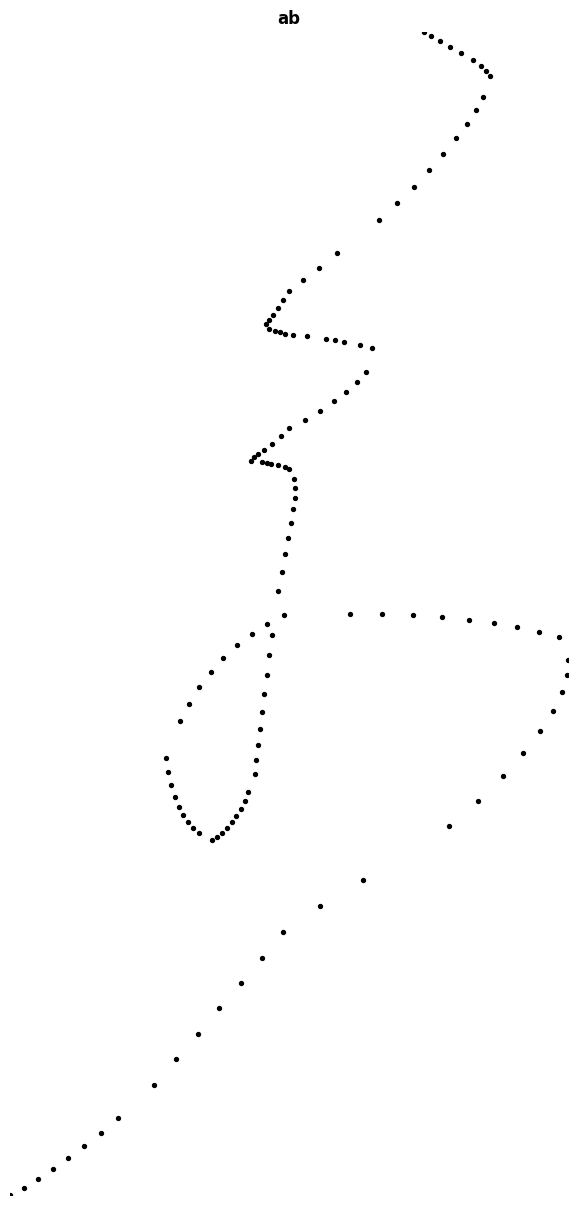

In [9]:
plot_points(0, save_path="word_0.png")

In [ ]:
# import cv2
# import numpy as np
# import matplotlib.pyplot as plt
# import os

# # --- Parameters to Adjust ---
# IMAGE_PATH = 'zurg.jpg' # Make sure this path is correct
# # ** CRITICAL **: Adjust this threshold after looking at the plot!
# # It's the max number of 'on' pixels in a column to be considered 'space'.
# # Start by looking at the plot values in the clear gaps between words.
# SPACE_THRESHOLD = 3
# # Minimum width for a blob of text to be considered a word (filters noise)
# MIN_WORD_WIDTH = 10
# # Minimum width for a gap to be considered a real space between words
# MIN_GAP_WIDTH = 5
# # Padding around cropped words
# PADDING = 3
# OUTPUT_DIR = 'segmented_words_visualized'
# # --- End Parameters ---

# # Create output directory
# if not os.path.exists(OUTPUT_DIR):
#     os.makedirs(OUTPUT_DIR)

# # 1. Load and Preprocess
# img = cv2.imread(IMAGE_PATH)
# if img is None:
#     print(f"Error: Could not load image at {IMAGE_PATH}")
#     exit()

# img_copy_for_drawing = img.copy() # Keep a copy for drawing lines later
# gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# # --- Binarization ---
# # Option 1: Otsu's Thresholding (try this first)
# # We want text white (255), background black (0)
# thresh_val, binary_img = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# # Option 2: Adaptive Thresholding (use if Otsu doesn't work well due to lighting)
# # binary_img = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, \
# #                                   cv2.THRESH_BINARY_INV, 11, 2) # Adjust block size (11) and C (2) if needed

# # ** VISUALIZE BINARIZED IMAGE **
# print("Showing binarized image. Press any key to continue...")
# cv2.imshow('Binarized Image (Text should be white)', binary_img)
# cv2.waitKey(0) # Wait for user key press
# cv2.destroyWindow('Binarized Image') # Close the window


# # 2. Calculate Vertical Projection Profile
# # Sum pixel values along vertical columns (axis=0)
# vertical_projection = np.sum(binary_img, axis=0) / 255 # Normalize sum by dividing by 255

# print("Calculated vertical projection profile.")

# # 3. ** VISUALIZE THE PROFILE ** (Crucial for setting SPACE_THRESHOLD)
# plt.figure(figsize=(15, 5))
# plt.plot(vertical_projection)
# plt.title('Vertical Projection Profile (Sum of White Pixels per Column)')
# plt.xlabel('Column (X-coordinate)')
# plt.ylabel('Sum of White Pixels (Normalized)')
# plt.grid(True)
# # Draw a line showing the current threshold
# plt.axhline(y=SPACE_THRESHOLD, color='r', linestyle='--', label=f'Current Threshold ({SPACE_THRESHOLD})')
# plt.legend()
# print(f"Showing projection profile plot. Look at the Y-axis values in the gaps between words.")
# print(f"Close the plot window to continue.")
# plt.show()

# # ---- Pause and Advise ----
# print("\n--- ACTION REQUIRED ---")
# print(f"Look at the plot that just appeared.")
# print(f"Find the gaps (valleys) between the taller peaks (words).")
# print(f"Note the approximate maximum value (Y-axis) within those gaps.")
# print(f"You need to set the 'SPACE_THRESHOLD' variable in the code")
# print(f"to a value slightly *higher* than those gap values, but *lower* than the word peaks.")
# print(f"The current SPACE_THRESHOLD is: {SPACE_THRESHOLD}")
# print(f"If you need to change it, edit the script and run again.")
# input("Press Enter to continue with the current threshold...") # Pause execution
# # --------------------------


# # 4. Identify Word Boundaries (using the SPACE_THRESHOLD)
# in_space = True # Start by assuming we are in a space
# word_boundaries = []
# start_x = 0
# current_gap_start = -1

# for x, projection_sum in enumerate(vertical_projection):
#     is_below_threshold = projection_sum <= SPACE_THRESHOLD

#     if is_below_threshold and not in_space:
#         # Entering a potential space
#         # Record where the potential gap starts
#         current_gap_start = x
#         # Potential end of the previous word
#         end_x = x

#         # Only record boundary if word is wide enough
#         if end_x - start_x >= MIN_WORD_WIDTH:
#             word_boundaries.append({'start': start_x, 'end': end_x})
#             # print(f"Word candidate: {start_x} to {end_x}")
#         # Now we are in a potential space
#         in_space = True

#     elif not is_below_threshold and in_space:
#         # Exiting a space, starting a new word
#         # Check if the gap we just exited was wide enough
#         gap_width = x - current_gap_start if current_gap_start != -1 else MIN_GAP_WIDTH # Handle start edge case
#         if gap_width >= MIN_GAP_WIDTH:
#              # Confirmed start of a new word
#             start_x = x
#             in_space = False
#             current_gap_start = -1 # Reset gap start tracking
#             # print(f"New word start at {x} after gap of width {gap_width}")
#         else:
#              # Gap was too narrow, treat as noise within the word/segment
#              # Stay 'in_space=True' until a wider gap or end of image
#              # This effectively merges across small dips if MIN_GAP_WIDTH is tuned well
#              # If we previously recorded a boundary ending at current_gap_start, it might need merging later,
#              # but let's keep it simple for now and focus on the threshold.
#              # Update in_space state ONLY if gap is wide enough
#              pass


# # Handle the last word if the image ends while in a word
# if not in_space:
#     end_x = binary_img.shape[1]
#     if end_x - start_x >= MIN_WORD_WIDTH:
#         word_boundaries.append({'start': start_x, 'end': end_x})
#         # print(f"Final word candidate: {start_x} to {end_x}")


# # Refined boundary list for drawing and cropping
# final_boundaries = [(b['start'], b['end']) for b in word_boundaries]
# print(f"\nFound {len(final_boundaries)} potential word boundaries using threshold={SPACE_THRESHOLD}.")
# # print(final_boundaries)

# # 5. ** VISUALIZE Separation Lines **
# line_color = (0, 255, 0) # Green color for lines
# line_thickness = 1

# if not final_boundaries:
#      print("No boundaries found with the current settings.")
# else:
#     print("Drawing separation lines on the original image...")
#     # Draw lines slightly inside the detected gaps for clarity
#     for i, (start_x, end_x) in enumerate(final_boundaries):
#         # Draw line at the start of the word (end of the previous gap)
#         if i > 0 or start_x > PADDING: # Don't draw line at the very beginning unless needed
#             cv2.line(img_copy_for_drawing, (start_x, 0), (start_x, img.shape[0]), line_color, line_thickness)
#         # Draw line at the end of the word (start of the next gap)
#         cv2.line(img_copy_for_drawing, (end_x, 0), (end_x, img.shape[0]), line_color, line_thickness)

#     print("Showing image with detected separation lines (green). Press any key to close.")
#     cv2.imshow('Detected Word Separations', img_copy_for_drawing)
#     cv2.waitKey(0)
#     cv2.destroyAllWindows()


# # 6. Extract and Save Word Images
# if final_boundaries:
#     print(f"Saving segmented words to '{OUTPUT_DIR}' directory...")
#     for i, (start_x, end_x) in enumerate(final_boundaries):
#         # Add padding, ensuring bounds are within image dimensions
#         crop_start_x = max(0, start_x - PADDING)
#         crop_end_x = min(img.shape[1], end_x + PADDING)

#         # Crop from the original image
#         word_img = img[0:img.shape[0], crop_start_x:crop_end_x] # Crop full height

#         # Save or display
#         if word_img.size > 0 and (crop_end_x - crop_start_x) > 0: # Check if the crop is valid
#             save_path = os.path.join(OUTPUT_DIR, f'word_{i+1:03d}.png')
#             cv2.imwrite(save_path, word_img)
#             # print(f"Saved {save_path}")
#         else:
#             print(f"Skipping empty or invalid crop for boundary {i+1} ({start_x}, {end_x})")
#     print("Word segmentation complete.")
# else:
#      print("No words segmented.")

Showing binarized image. Press any key to continue...


error: OpenCV(4.11.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window_w32.cpp:1261: error: (-27:Null pointer) NULL window: 'Binarized Image' in function 'cvDestroyWindow'


Image loaded successfully.
Binarized Image (Text should be white):


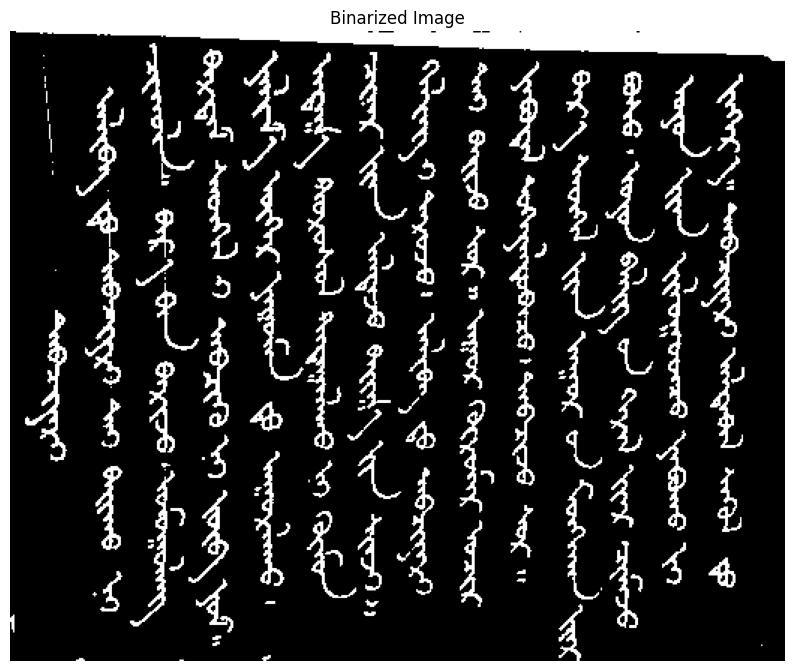

In [33]:
# Load image
img = cv2.imread(IMAGE_PATH)
if img is None:
    print(f"Error: Could not load image at {IMAGE_PATH}")
    # In Jupyter, you might want to stop or handle differently
    # raise FileNotFoundError(f"Could not load image at {IMAGE_PATH}")
else:
    print("Image loaded successfully.")
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # For displaying original later
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Binarization (Otsu should still work well)
    # Text white (255), background black (0)
    thresh_val, binary_img = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

    print("Binarized Image (Text should be white):")
    plt.figure(figsize=(10, 10)) # Adjust figsize if needed
    plt.imshow(binary_img, cmap='gray')
    plt.title('Binarized Image')
    plt.axis('off') # Hide axes ticks
    plt.show()

    # --- Optional: Apply Morphological Opening (if still needed for noise) ---
    # If you found opening helpful before, you can apply it here to binary_img
    # open_kernel = np.ones((OPEN_KERNEL_HEIGHT, OPEN_KERNEL_WIDTH), np.uint8)
    # binary_img = cv2.morphologyEx(binary_img, cv2.MORPH_OPEN, open_kernel)
    # print("Applied Morphological Opening (Optional)")
    # plt.figure(figsize=(10,10))
    # plt.imshow(binary_img, cmap='gray')
    # plt.title('Binary Image After Opening (Optional)')
    # plt.axis('off')
    # plt.show()
    # --- End Optional Opening ---

Calculated vertical projection profile.
Found 13 potential valleys using find_peaks.

--- ACTION REQUIRED ---
Examine the plots above, especially the *Inverted Profile*.
Red markers show the detected valleys/peaks.
  - Are the markers placed correctly at the gaps BETWEEN words?
  - Are markers missing from real gaps? -> DECREASE 'MIN_VALLEY_PROMINENCE' (or distance).
  - Are markers appearing inside words (small dips)? -> INCREASE 'MIN_VALLEY_PROMINENCE' (or distance).
The 'prominence' value (orange lines, if shown) is key.
--> Go back to Cell 1, adjust parameters (mainly MIN_VALLEY_PROMINENCE), and re-run Cell 1 and this cell.


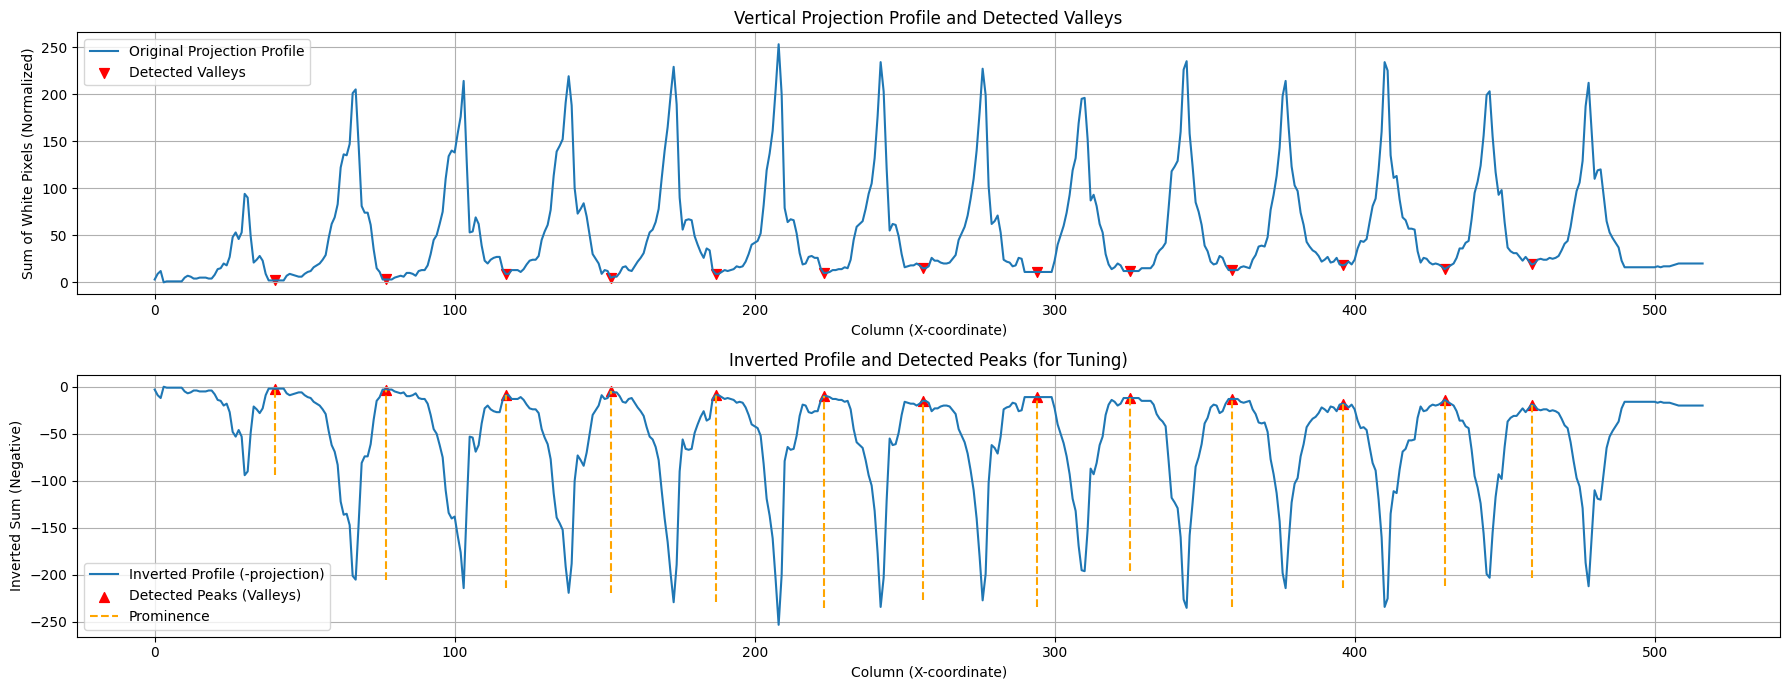

In [34]:
if img is not None and binary_img is not None:
    # Calculate Vertical Projection Profile
    # Sum pixel values along vertical columns (axis=0)
    # Normalize sum by dividing by 255 (max pixel value)
    vertical_projection = np.sum(binary_img, axis=0) / 255
    print("Calculated vertical projection profile.")

    # --- Find Valleys using find_peaks ---
    # Invert the profile: peaks in inverted profile correspond to valleys in original
    # Using simple negation might be sensitive to the absolute scale.
    # Using max() - profile makes heights more relative. Choose one.
    # inverted_projection = np.max(vertical_projection) - vertical_projection
    inverted_projection = -vertical_projection # Simpler inversion

    # Find peaks in the inverted profile (valleys in the original)
    # Pass parameters defined in Cell 1
    valleys, properties = find_peaks(
        inverted_projection,
        distance=MIN_VALLEY_DISTANCE,
        prominence=MIN_VALLEY_PROMINENCE
        # height=MIN_INVERTED_PEAK_HEIGHT, # Uncomment if using height
        # width=MIN_VALLEY_WIDTH       # Uncomment if using width
    )
    print(f"Found {len(valleys)} potential valleys using find_peaks.")
    # valleys now contains the x-coordinates of the detected valleys (centers of spaces)

    # --- Plot the Profile and Detected Valleys ---
    plt.figure(figsize=(18, 7)) # Wider figure

    # Plot Original Profile
    plt.subplot(2, 1, 1) # 2 rows, 1 column, first plot
    plt.plot(vertical_projection, label='Original Projection Profile')
    plt.scatter(valleys, vertical_projection[valleys], color='red', marker='v', s=50, label='Detected Valleys')
    plt.title('Vertical Projection Profile and Detected Valleys')
    plt.xlabel('Column (X-coordinate)')
    plt.ylabel('Sum of White Pixels (Normalized)')
    plt.legend()
    plt.grid(True)

    # Plot Inverted Profile and Detected Peaks
    plt.subplot(2, 1, 2) # 2 rows, 1 column, second plot
    plt.plot(inverted_projection, label='Inverted Profile (-projection)')
    plt.scatter(valleys, inverted_projection[valleys], color='red', marker='^', s=50, label='Detected Peaks (Valleys)')
    # Optional: Plot prominence lines (useful for tuning)
    if 'prominences' in properties:
      plt.vlines(x=valleys, ymin=inverted_projection[valleys] - properties['prominences'],
                 ymax=inverted_projection[valleys], color='orange', linestyle='--', label='Prominence')

    # Optional: Plot height threshold line if using height parameter
    # if MIN_INVERTED_PEAK_HEIGHT is not None:
    #     plt.axhline(y=MIN_INVERTED_PEAK_HEIGHT, color='purple', linestyle=':', label=f'Min Height ({MIN_INVERTED_PEAK_HEIGHT})')


    plt.title('Inverted Profile and Detected Peaks (for Tuning)')
    plt.xlabel('Column (X-coordinate)')
    plt.ylabel('Inverted Sum (Negative)')
    plt.legend()
    plt.grid(True)

    plt.tight_layout() # Adjust spacing

    print(f"\n--- ACTION REQUIRED ---")
    print(f"Examine the plots above, especially the *Inverted Profile*.")
    print(f"Red markers show the detected valleys/peaks.")
    print(f"  - Are the markers placed correctly at the gaps BETWEEN words?")
    print(f"  - Are markers missing from real gaps? -> DECREASE 'MIN_VALLEY_PROMINENCE' (or distance).")
    print(f"  - Are markers appearing inside words (small dips)? -> INCREASE 'MIN_VALLEY_PROMINENCE' (or distance).")
    print(f"The 'prominence' value (orange lines, if shown) is key.")
    print(f"--> Go back to Cell 1, adjust parameters (mainly MIN_VALLEY_PROMINENCE), and re-run Cell 1 and this cell.")
    plt.show()

else:
    print("Skipping profile calculation/valley finding because image or binary image is not available.")

Defining boundaries based on 13 detected valleys...

Found 14 potential word boundaries using find_peaks.
Drawing separation lines...
Showing image with detected separation lines (green) at valley locations:


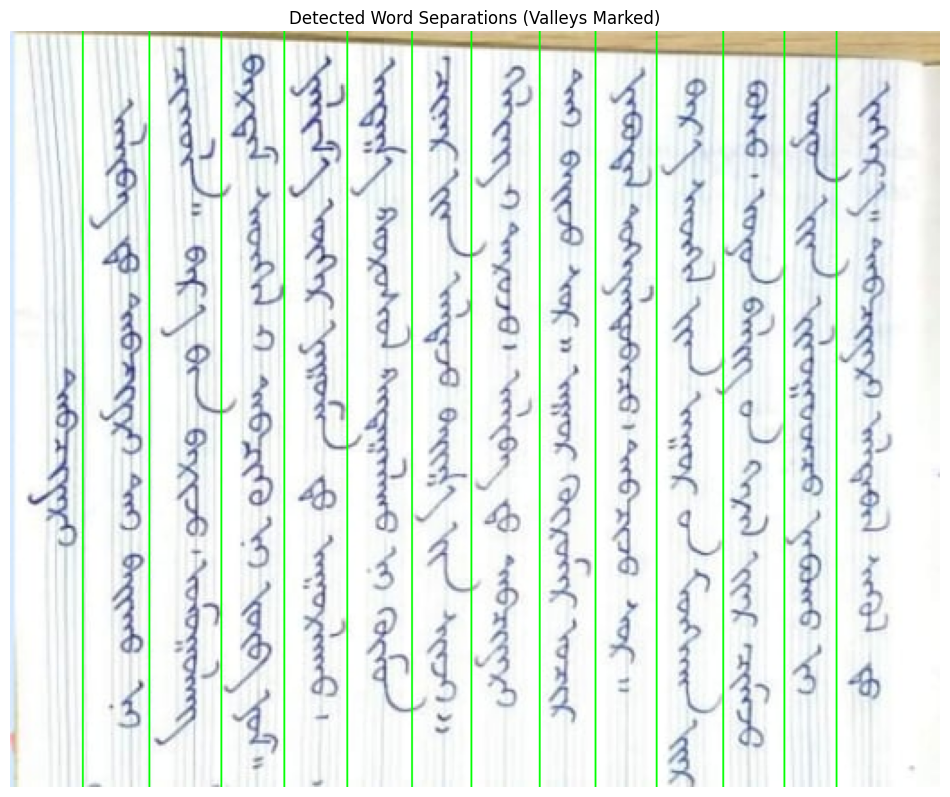

In [35]:
if img is not None and valleys is not None:
    # --- Define Word Boundaries Based on Valley Locations ---
    word_boundaries = []
    start_x = 0
    img_width = binary_img.shape[1]

    print(f"Defining boundaries based on {len(valleys)} detected valleys...")

    # Iterate through the detected valley locations (which are the gaps)
    for i, valley_x in enumerate(valleys):
        end_x = valley_x # The space starts around here

        # Check if the segment before this valley is wide enough to be a word
        if end_x - start_x >= MIN_WORD_WIDTH:
            word_boundaries.append({'start': start_x, 'end': end_x})
            # print(f"  Added word: ({start_x}, {end_x}), Width: {end_x - start_x}") # Debug print

        # The next word starts after this valley
        start_x = valley_x

    # Handle the last word (from the last valley to the end of the image)
    end_x = img_width
    if end_x - start_x >= MIN_WORD_WIDTH:
         word_boundaries.append({'start': start_x, 'end': end_x})
         # print(f"  Added last word: ({start_x}, {end_x}), Width: {end_x - start_x}") # Debug print


    # Final list of (start, end) tuples
    final_boundaries = [(b['start'], b['end']) for b in word_boundaries]
    print(f"\nFound {len(final_boundaries)} potential word boundaries using find_peaks.")
    # print(f"Boundaries: {final_boundaries}") # Debug print

    # --- Visualize Separation Lines ---
    img_copy_for_drawing = img.copy() # Use the original color image BGR format
    line_color_bgr = (0, 255, 0) # Green in BGR
    line_thickness = 1

    if not final_boundaries:
         print("No word boundaries found to draw.")
    else:
        print("Drawing separation lines...")
        # Draw lines AT the detected valley locations (the gaps)
        # We can draw at the start/end derived, or directly at valleys
        for valley_x in valleys:
            cv2.line(img_copy_for_drawing, (valley_x, 0), (valley_x, img.shape[0]), line_color_bgr, line_thickness)

        # Display the image with lines using Matplotlib
        print("Showing image with detected separation lines (green) at valley locations:")
        plt.figure(figsize=(12, 10))
        plt.imshow(cv2.cvtColor(img_copy_for_drawing, cv2.COLOR_BGR2RGB))
        plt.title('Detected Word Separations (Valleys Marked)')
        plt.axis('off')
        plt.show()

elif img is not None:
     print("Valleys were not detected. Cannot identify boundaries.")
else:
    print("Skipping boundary identification because image failed to load.")


Extracting 14 word images...
Successfully extracted 14 words.

Displaying first 10 extracted words:


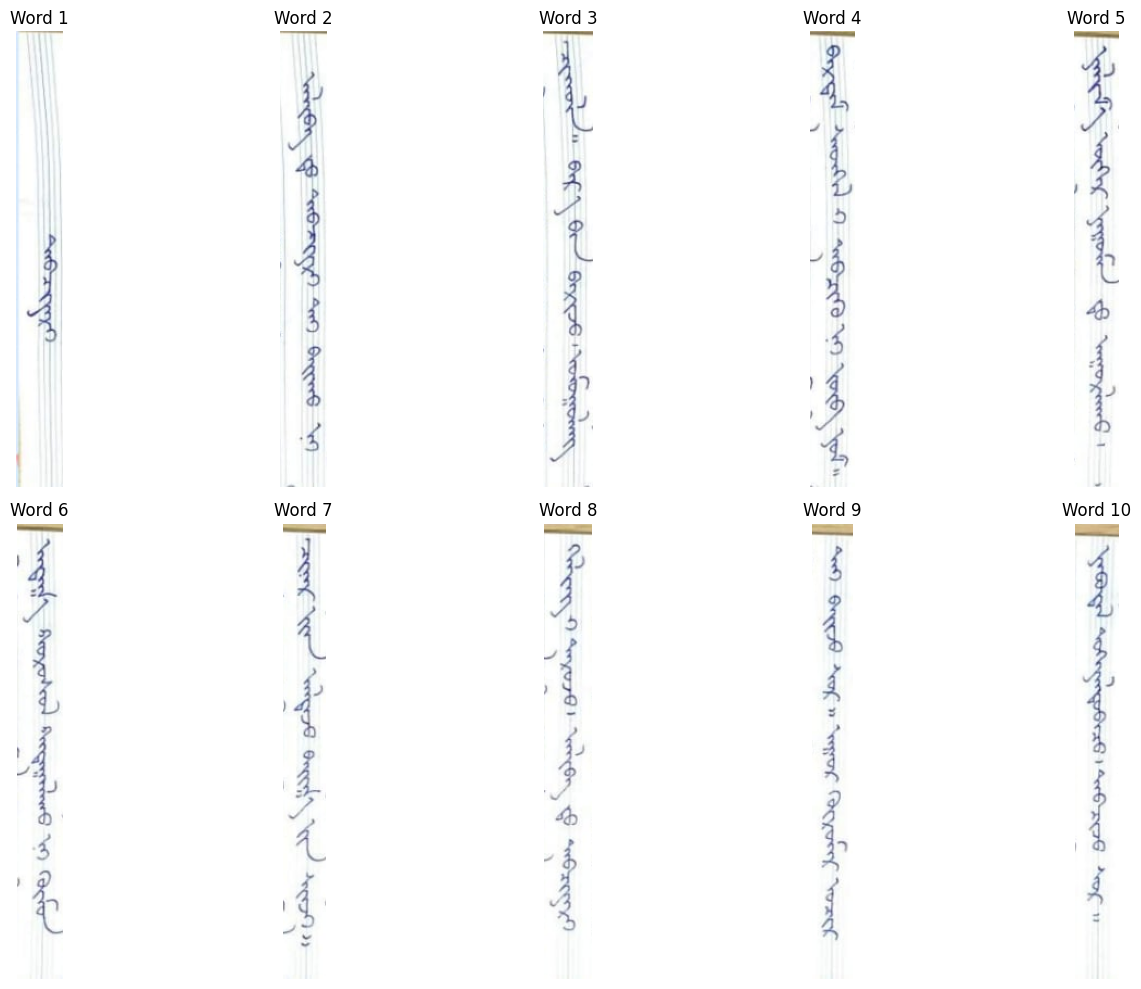

In [36]:
# Reset list for potentially new run
cropped_words_rgb = []

if img is not None and final_boundaries:
    print(f"\nExtracting {len(final_boundaries)} word images...")

    for i, (start_x, end_x) in enumerate(final_boundaries):
        # Calculate crop coordinates with padding
        # Ensure start/end are within image bounds *after* potential valley shifts
        crop_start_x = max(0, start_x - PADDING)
        crop_end_x = min(img.shape[1], end_x + PADDING)

        # Ensure coordinates are valid
        if crop_start_x >= crop_end_x:
             print(f"Skipping invalid crop for boundary {i+1}: start={start_x}, end={end_x} -> crop=({crop_start_x}, {crop_end_x})")
             continue

        # Crop from the original BGR image
        word_img_bgr = img[0:img.shape[0], crop_start_x:crop_end_x]

        # Ensure the crop is valid before adding
        if word_img_bgr.size > 0:
            # Convert to RGB for displaying and store it
            cropped_words_rgb.append(cv2.cvtColor(word_img_bgr, cv2.COLOR_BGR2RGB))
        else:
            print(f"Skipping empty crop for boundary {i+1} ({start_x}, {end_x}) -> crop=({crop_start_x}, {crop_end_x})")

    print(f"Successfully extracted {len(cropped_words_rgb)} words.")

    # Display the first few extracted words using Matplotlib
    num_to_show = min(len(cropped_words_rgb), 10) # Show up to 10 words
    if num_to_show > 0:
        print(f"\nDisplaying first {num_to_show} extracted words:")
        cols = min(num_to_show, 5) # Max 5 columns
        rows = (num_to_show + cols - 1) // cols
        plt.figure(figsize=(cols * 3, rows * 5)) # Adjust size

        for i in range(num_to_show):
            plt.subplot(rows, cols, i + 1)
            plt.imshow(cropped_words_rgb[i])
            plt.title(f'Word {i+1}')
            plt.axis('off')

        plt.tight_layout()
        plt.show()

    # The 'cropped_words_rgb' list now contains the segmented word images

elif img is not None:
     print("No word boundaries were defined (likely no valleys found or image issue). Cannot extract words.")
else:
    print("Skipping word extraction because image failed to load.")

In [38]:
# --- Cell 6: Save Segmented Words to Files ---
import os
import cv2
import numpy as np # Should already be imported

# --- Parameters for Saving ---
# Directory where the segmented word images will be saved.
# This directory will be created in the same location as your notebook/script
# if it doesn't already exist.
OUTPUT_DIR = 'segmented_words'

# Optional: Prefix for saved filenames. Useful if processing multiple images.
# It tries to use the original image filename as a base.
try:
    # Ensure IMAGE_PATH variable from Cell 1 is accessible
    if 'IMAGE_PATH' in locals() and IMAGE_PATH:
         base_filename = os.path.basename(IMAGE_PATH)
         # Remove extension and add underscore
         filename_prefix = os.path.splitext(base_filename)[0] + "_"
    else:
         print("Warning: IMAGE_PATH not found or empty, using generic prefix 'word_'.")
         filename_prefix = "word_" # Fallback prefix
except NameError:
    print("Warning: IMAGE_PATH variable not defined, using generic prefix 'word_'.")
    filename_prefix = "word_" # Fallback prefix

# File format for saved images (e.g., 'png', 'jpg', 'bmp')
SAVE_FORMAT = 'png'
# --- End Parameters ---

print(f"\n--- Saving Segmented Words ---")
print(f"Output directory: ./{OUTPUT_DIR}") # Show relative path
print(f"Filename prefix will be: '{filename_prefix}'")
print(f"Save format: .{SAVE_FORMAT}")


# Check if the list of cropped words exists and has content
# 'cropped_words_rgb' should be populated by the end of Cell 5
if 'cropped_words_rgb' in locals() and cropped_words_rgb:

    # Create the output directory if it doesn't exist
    if not os.path.exists(OUTPUT_DIR):
        try:
            os.makedirs(OUTPUT_DIR)
            print(f"Created directory: '{OUTPUT_DIR}'")
        except OSError as e:
            print(f"Error: Could not create directory '{OUTPUT_DIR}': {e}")
            # Decide how to handle error: maybe stop, maybe continue without saving
            print("Cannot save files without output directory. Stopping.")
            cropped_words_rgb = [] # Clear list to prevent further processing

    # Proceed only if directory exists (or was created) and we have words
    if os.path.exists(OUTPUT_DIR) and cropped_words_rgb:
        saved_count = 0
        # Iterate through the cropped word images (which are in RGB format)
        for i, word_img_rgb in enumerate(cropped_words_rgb):

            # Basic check for valid image data
            if word_img_rgb is None or word_img_rgb.size == 0:
                 print(f"  Skipping empty or invalid word image at index {i}.")
                 continue

            # 1. Generate filename (e.g., "image_name_word_001.png")
            #    Using zfill(3) pads the number with leading zeros (001, 002, ... 010, etc.)
            #    for better file sorting in folders.
            filename = f"{filename_prefix}word_{str(i+1).zfill(3)}.{SAVE_FORMAT}"
            save_path = os.path.join(OUTPUT_DIR, filename)

            # 2. Convert image from RGB (used by Matplotlib) back to BGR (used by cv2.imwrite)
            try:
                word_img_bgr = cv2.cvtColor(word_img_rgb, cv2.COLOR_RGB2BGR)
            except cv2.error as e:
                print(f"  Error converting word {i+1} to BGR format: {e}. Skipping this image.")
                continue # Skip saving this problematic image

            # 3. Save the image using cv2.imwrite
            try:
                success = cv2.imwrite(save_path, word_img_bgr)
                if success:
                    # print(f"  Saved: {save_path}") # Uncomment for verbose output
                    saved_count += 1
                else:
                    # This might happen due to permissions, invalid path, etc.
                    print(f"  Warning: cv2.imwrite failed to save '{save_path}' (returned False).")
            except Exception as e:
                # Catch other potential errors during file writing
                print(f"  Error writing file '{save_path}': {e}")

        print(f"\nFinished saving.")
        print(f"Successfully saved {saved_count} out of {len(cropped_words_rgb)} detected word images to the '{OUTPUT_DIR}' directory.")

elif 'cropped_words_rgb' in locals():
     print("The list 'cropped_words_rgb' is empty. No words were segmented or available to save.")
else:
     print("Error: The variable 'cropped_words_rgb' containing word images was not found.")
     print("       Please ensure the previous cells (especially Cell 5) ran correctly and produced results.")


--- Saving Segmented Words ---
Output directory: ./segmented_words
Filename prefix will be: 'zurg_'
Save format: .png
Created directory: 'segmented_words'

Finished saving.
Successfully saved 14 out of 14 detected word images to the 'segmented_words' directory.
